<a href="https://colab.research.google.com/github/Jeonkyoungyong/bigdata/blob/main/7%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'
weather = pd.read_csv(weather_file, encoding='CP949')


print('최대풍속의 최대값 ', weather['최대풍속'].max())
print('평균풍속의 최대값 ', weather['평균풍속'].max())


weather = pd.read_csv(weather_file, index_col = 0, encoding='CP949')
print(weather.head(3))
print('weather 데이터의 shape :', weather.shape)

print('평균분석----------------')
print(weather.mean())
print('평균편차 분석----------------')
print(weather.std())



최대풍속의 최대값  26.0
평균풍속의 최대값  14.9
            평균기온  최대풍속  평균풍속
일시                          
2010-08-01  28.7   8.3   3.4
2010-08-02  25.2   8.7   3.8
2010-08-03  22.1   6.3   2.9
weather 데이터의 shape : (3653, 3)
평균분석----------------
평균기온    12.942102
최대풍속     7.911099
평균풍속     3.936441
dtype: float64
평균편차 분석----------------
평균기온    8.538507
최대풍속    3.029862
평균풍속    1.888473
dtype: float64


In [71]:
weather.count()


평균기온    3653
최대풍속    3649
평균풍속    3647
dtype: int64

In [73]:
weather.fillna(0, inplace = True)
print(weather.loc['2012-02-11'])


평균기온   -0.7
최대풍속    0.0
평균풍속    0.0
Name: 2012-02-11, dtype: float64


In [74]:
weather.fillna(weather['평균풍속'].mean(), inplace = True)
print(weather.loc['2012-02-11'])

평균기온   -0.7
최대풍속    0.0
평균풍속    0.0
Name: 2012-02-11, dtype: float64


In [77]:
d_list = ["01/03/2018", "01-03-2018", "2018-01-05", "2018/01/06"]
pd.DatetimeIndex(d_list).year

Index([2018, 2018, 2018, 2018], dtype='int32')

In [79]:
pd.DatetimeIndex(d_list).month

Index([1, 1, 1, 1], dtype='int32')

In [80]:
pd.DatetimeIndex(d_list).day

Index([3, 3, 5, 6], dtype='int32')

In [82]:
dt_list = ["01,03,2018 11:12:13", "01-03-2018 11:22:13"]
pd.DatetimeIndex(dt_list).hour

Index([11, 11], dtype='int32')

In [83]:
pd.DatetimeIndex(dt_list).minute

Index([12, 22], dtype='int32')

In [86]:
weather = pd.read_csv(weather_file, encoding='CP949')
weather['일시'] = pd.DatetimeIndex(weather['일시']).year
weather

,일시,평균기온,최대풍속,평균풍속
0,2010,28.7,8.3,3.4
1,2010,25.2,8.7,3.8
2,2010,22.1,6.3,2.9
3,2010,25.3,6.6,4.2
4,2010,27.2,9.1,5.6
...,...,...,...,...
3648,2020,22.1,4.2,1.7
3649,2020,21.9,4.5,1.6
3650,2020,21.6,3.2,1.0
3651,2020,22.9,9.7,2.4


Text(0, 0.5, 'Temperature')

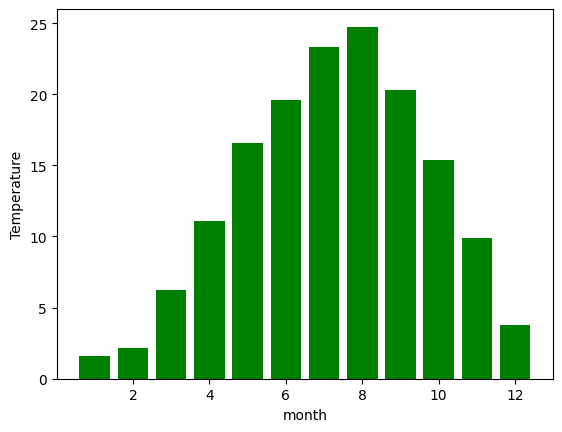

In [88]:
weather = pd.read_csv(weather_file, encoding='CP949')
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range(12)]
monthly_wind = [ 0 for x in range(12) ]
for i in range(12) :
  monthly[i] = weather[ weather['month'] == i + 1 ]
  monthly_wind[i] = monthly[i].mean(numeric_only=True)['평균기온']

months = np.arange(1, 13)
plt.bar(months, monthly_wind, color='green')
plt.xlabel('month')
plt.ylabel('Temperature')

Text(0, 0.5, 'windspeed')

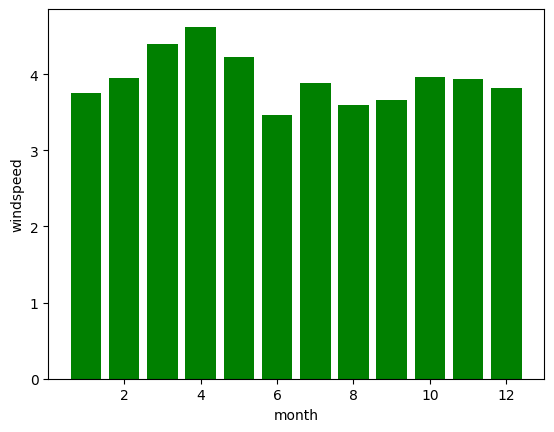

In [90]:
weather = pd.read_csv(weather_file, encoding='CP949')
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range(12)]
monthly_wind = [ 0 for x in range(12) ]
for i in range(12) :
  monthly[i] = weather[ weather['month'] == i + 1 ]
  monthly_wind[i] = monthly[i].mean(numeric_only=True)['평균풍속']

months = np.arange(1, 13)
plt.bar(months, monthly_wind, color='green')
plt.xlabel('month')
plt.ylabel('windspeed')